In [1]:
####================ Import Libraries ================
#Import required packages
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")



In [2]:
####=========== Import and read the dataset ===========

# reading dataset as pandas DataFrame
df_main = pd.read_csv('US_Accidents_June20.csv')
df_main = pd.DataFrame(df_main)

#shape of dataset
print(df_main.shape)

(3513617, 49)


In [3]:
# Getting DataFrame copy to avoid changes in original main file
df = df_main.copy()
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
# reading all the columns/features names as list for our reference
print(df.columns)


Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


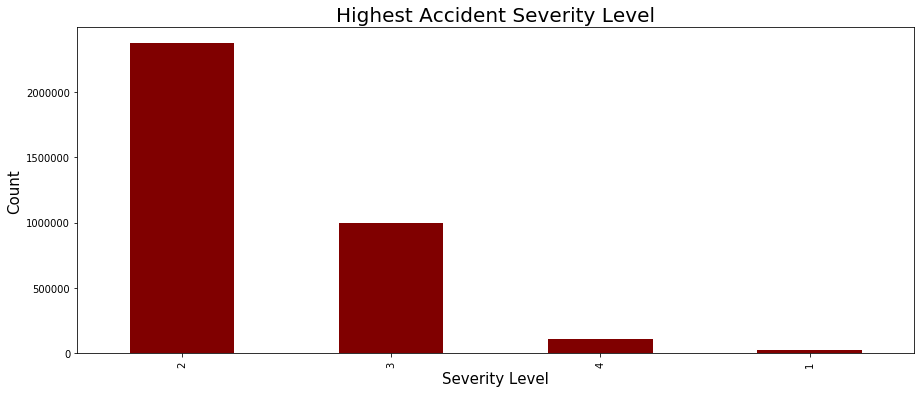

In [5]:
# Severity of Accidents happening the most 
plt.figure(figsize=(15,6))
state_accidents = df.Severity.value_counts().plot(kind='bar',color='maroon')
state_accidents.set_xlabel('Severity Level', fontsize=15)
state_accidents.set_ylabel('Count', fontsize=15)
state_accidents.set_title('Highest Accident Severity Level', fontsize=20)
plt.show()

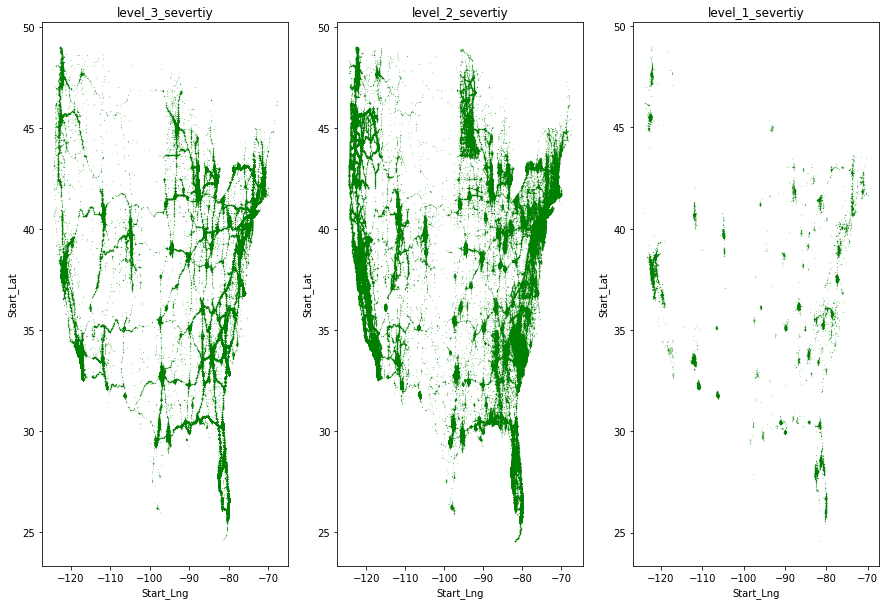

In [6]:
# severity of accidents shown using Lat Long
level3 = df[df['Severity'] == 3]
level2 = df[df['Severity'] == 2]
level1 = df[df['Severity'] == 1]

s, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,10))

# level 1 plot

level1.plot(kind='scatter', x='Start_Lng',y ='Start_Lat',
                color='green', 
                s=.02, alpha=.6, subplots=True, ax=ax3)
ax3.set_title("level_1_severtiy")
ax3.set_facecolor('white')

## level 2 plot
level2.plot(kind='scatter', x='Start_Lng',y ='Start_Lat',
                color='green', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("level_2_severtiy")
ax2.set_facecolor('white')


## level 3 plot
level3.plot(kind='scatter', x='Start_Lng',y ='Start_Lat',
                color='green', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("level_3_severtiy")
ax1.set_facecolor('white')

s.show()

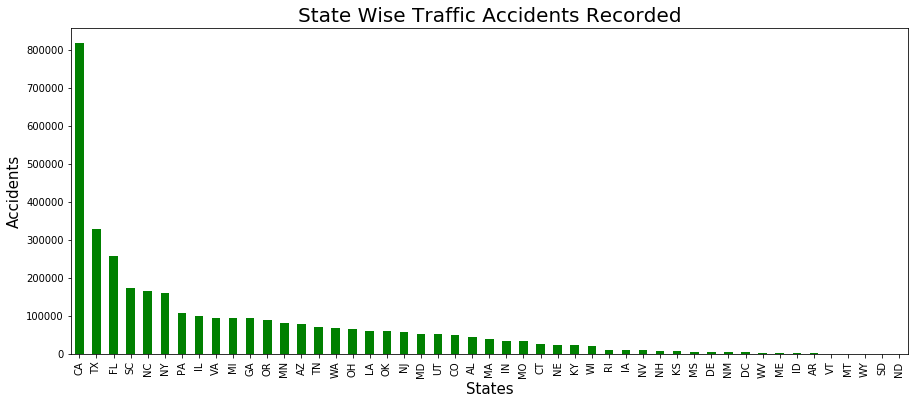

In [7]:
#State wise highest number of accidents to narrow down the scope of project
plt.figure(figsize=(15,6))
state_accidents = df.State.value_counts().plot(kind='bar',color='green')
state_accidents.set_xlabel('States', fontsize=15)
state_accidents.set_ylabel('Accidents', fontsize=15)
state_accidents.set_title('State Wise Traffic Accidents Recorded', fontsize=20)
plt.show()

In [8]:
# #### =================DATASET INFO & DESCRIPTION =================
print ('='*50 + '\n')
print("Features Description")
print ('='*50 + '\n')
print(df.describe())


#Missing values and dtype of all the features of dataset  
print ('='*50 + '\n')
print("Features with Missing value and dtypes", '\n')
print ('='*50 + '\n')
missingvalues_dtypes = pd.concat([df.isnull().sum(), df.dtypes], axis =1 )
print(missingvalues_dtypes)


Features Description

                TMC      Severity     Start_Lat     Start_Lng       End_Lat  \
count  2.478818e+06  3.513617e+06  3.513617e+06  3.513617e+06  1.034799e+06   
mean   2.080226e+02  2.339929e+00  3.654195e+01 -9.579151e+01  3.755758e+01   
std    2.076627e+01  5.521935e-01  4.883520e+00  1.736877e+01  4.861215e+00   
min    2.000000e+02  1.000000e+00  2.455527e+01 -1.246238e+02  2.457011e+01   
25%    2.010000e+02  2.000000e+00  3.363784e+01 -1.174418e+02  3.399477e+01   
50%    2.010000e+02  2.000000e+00  3.591687e+01 -9.102601e+01  3.779736e+01   
75%    2.010000e+02  3.000000e+00  4.032217e+01 -8.093299e+01  4.105139e+01   
max    4.060000e+02  4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01   

            End_Lng  Distance(mi)        Number  Temperature(F)  \
count  1.034799e+06  3.513617e+06  1.250753e+06    3.447885e+06   
mean  -1.004560e+02  2.816167e-01  5.975383e+03    6.193512e+01   
std    1.852879e+01  1.550134e+00  1.496624e+04    1.862106e+01 

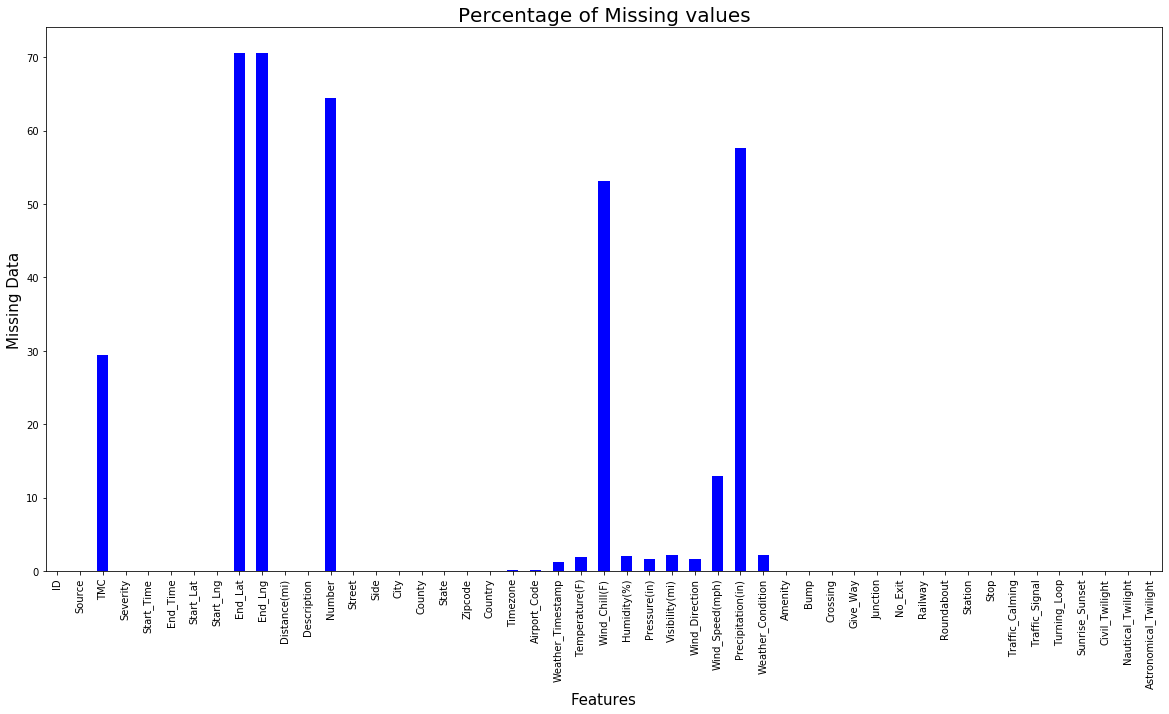

In [9]:
# calculating percentage missing values for each feature using bar graph in matplotlib
percentage_missing_values = df.isnull().sum() / df.shape[0]*100
plot_missing_val = percentage_missing_values.plot(kind = 'bar', color='blue', figsize = (20, 10),)
plot_missing_val.set_xlabel('Features', fontsize=15)
plot_missing_val.set_ylabel('Missing Data', fontsize=15)
plot_missing_val.set_title('Percentage of Missing values', fontsize=20)
plt.show()

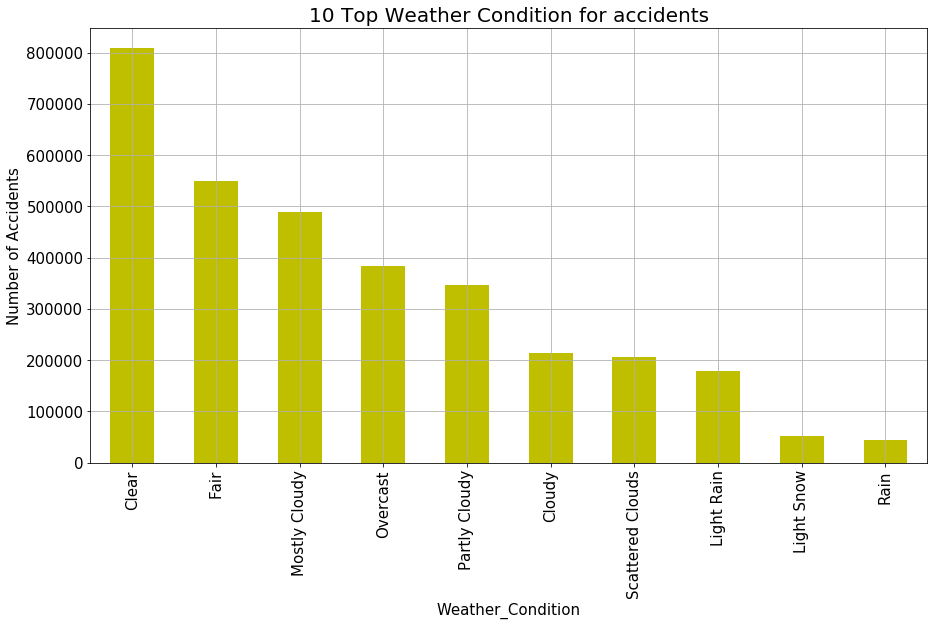

In [10]:
# Top 5 Weather Conditions under which mostly accidents happening
# Reference: https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.subplots.html

figure,axis =plt.subplots(figsize=(15,8))
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,edgecolor='y',align='center',linewidth=2, color = 'y')
plt.xlabel('Weather_Condition',fontsize=15)
plt.ylabel('Number of Accidents',fontsize=15)
axis.tick_params(labelsize=15)
plt.title('10 Top Weather Condition for accidents',fontsize=20)
plt.grid()

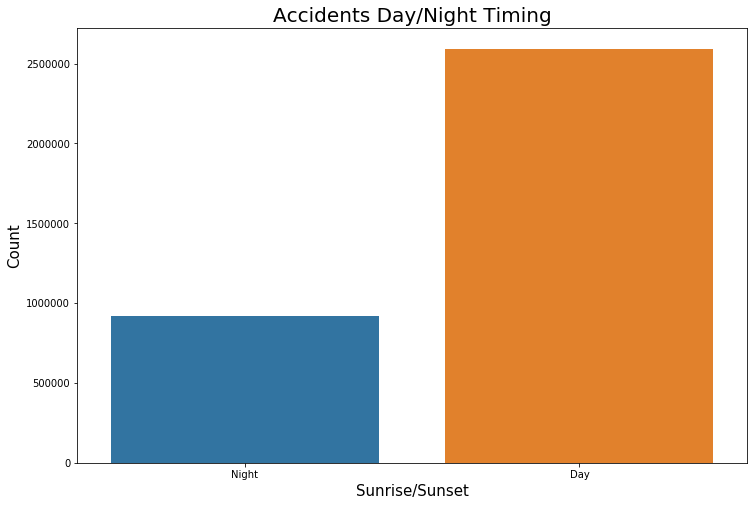

In [11]:
# Most Accidents Timing- Day/Night

plt.figure(figsize=(12,8))
Sunrise_Sunset_accidents= sns.countplot(x='Sunrise_Sunset',data=df)
Sunrise_Sunset_accidents.set_xlabel('Sunrise/Sunset', fontsize=15)
Sunrise_Sunset_accidents.set_ylabel('Count', fontsize=15)
Sunrise_Sunset_accidents.set_title('Accidents Day/Night Timing', fontsize=20)
plt.show()

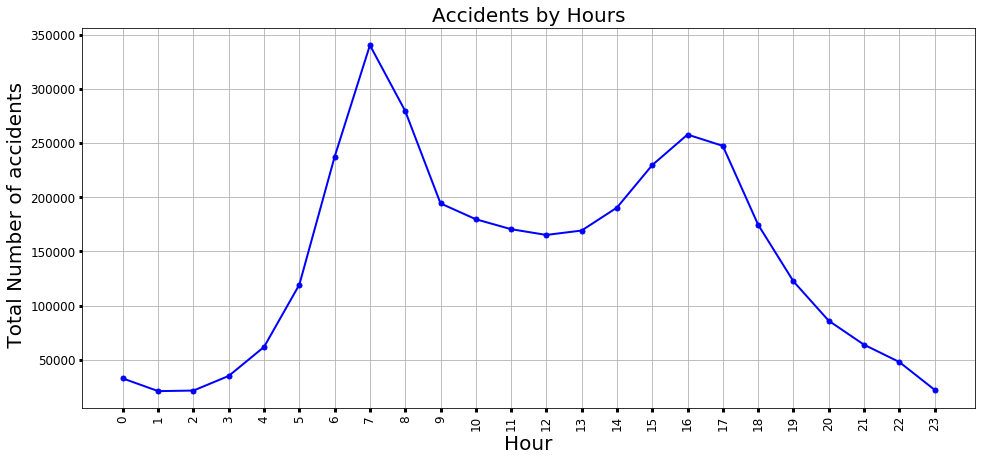

In [12]:
# Most Accidents happening Hours through out the day
#Reference: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day.html

figure,axis = plt.subplots(figsize=(16,7))
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], errors='coerce')
df['Start_Hour'] = df['Weather_Timestamp'].dt.hour
plt.plot(df.groupby(['Start_Hour'])['Severity'].count(), linewidth=2, marker='o', markersize=5, markeredgecolor = 'b', color ='b')
plt.xlabel('Hour',fontsize=20)
plt.ylabel(' Total Number of accidents',fontsize=20)
plt.title('Accidents by Hours',fontsize=20)
plt.xticks(np.arange(0,24),rotation=90)
axis.tick_params(labelsize=12, width=3)
plt.grid()
plt.show()


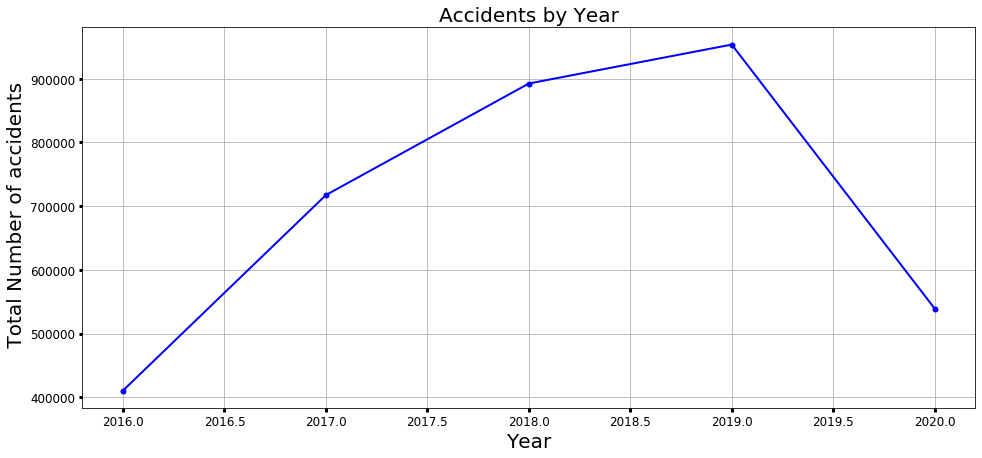

In [13]:
#DATA WRANGLING TO CONVERT TIMESTAMP OBJECT TYPE TO DATE TIME FORMAT to extract YEAR,MONTH, of Accidenty
#Reference: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html

figure,axis = plt.subplots(figsize=(16,7))
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Year'] = df['Start_Time'].dt.year
plt.plot(df.groupby(['Year'])['Severity'].count(), linewidth=2, marker='o', markersize=5, markeredgecolor = 'b', color ='b')
plt.xlabel('Year',fontsize=20)
plt.ylabel(' Total Number of accidents',fontsize=20)
plt.title('Accidents by Year',fontsize=20)
axis.tick_params(labelsize=12, width=3)
plt.grid()
plt.show()

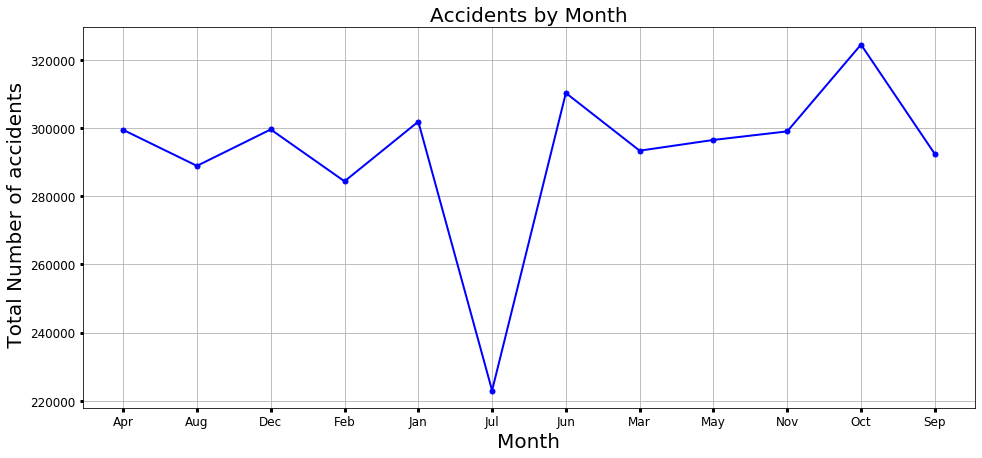

In [14]:
#Month in which at which max accidents happening
figure,axis = plt.subplots(figsize=(16,7) )
df['Month'] = df['Start_Time'].dt.strftime('%b') 
plt.plot(df.groupby(['Month'])['ID'].count(), linewidth=2, marker='o', markersize=5, markeredgecolor = 'b', 
         color ='b')
plt.xlabel('Month',fontsize=20)
plt.ylabel(' Total Number of accidents',fontsize=20)
plt.title('Accidents by Month',fontsize=20)
axis.tick_params(labelsize=12, width=3)
plt.grid()
plt.show()

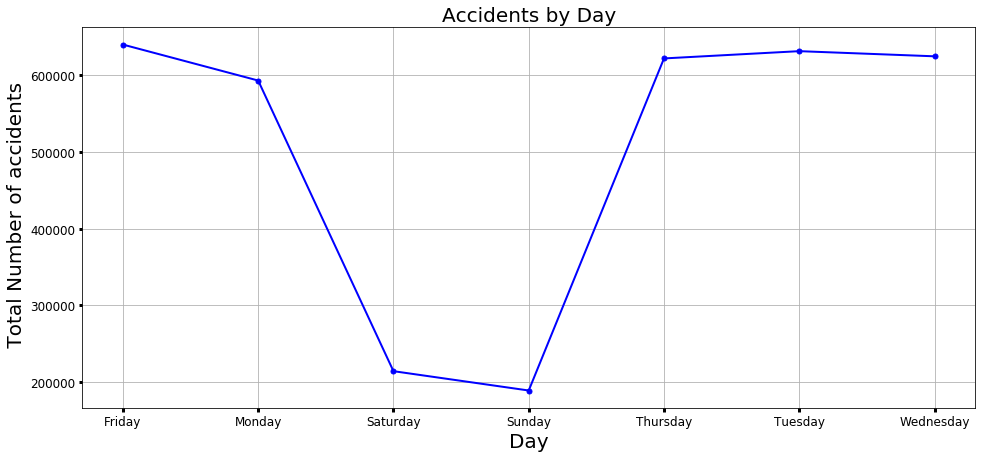

In [15]:
#Day Name at which max accidents happening
figure,axis = plt.subplots(figsize=(16,7))
df['Day'] = df['Start_Time'].dt.day_name()
plt.plot(df.groupby(['Day'])['Severity'].count(), linewidth=2, marker='o', markersize=5, markeredgecolor = 'b', color ='b')
plt.xlabel('Day',fontsize=20)
plt.ylabel(' Total Number of accidents',fontsize=20)
plt.title('Accidents by Day',fontsize=20)
axis.tick_params(labelsize=12, width=3)
plt.grid()
plt.show()

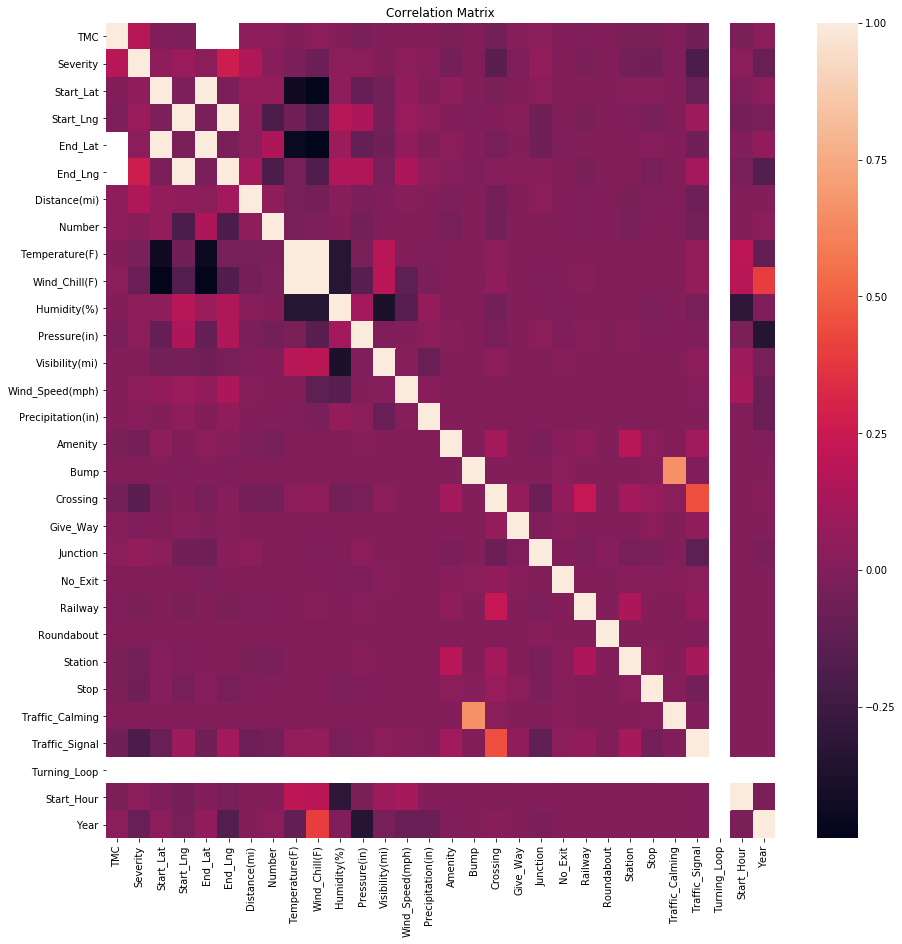

In [16]:
#Correlation matrix to if there are some independent viariable who are highly collinear (to avoid multicollinearity)
plt.figure(figsize=(15,15))
correlation_matrix = df.corr()
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix)

# Data Preprocessing

In [17]:
# Dropping few columns right away as they have no use. Some of the columns are serving same purpose so using just 
#one out them.
# Dropping columns with more than 50 % MISSING VALUES like "End_Lat", "End_Lng", "Number"
# There are columns like country,description, city, county etc as they Text Attributes 
#and will not use them in our analysis.We will drop all the columns with contributing to natural language processing.


drop_irrelavent_cols = df.loc[:,['Source','Start_Time', 'End_Time','Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County',
                                 'Timezone','Country', 'Airport_Code','Weather_Timestamp','Civil_Twilight', 
                                 'Nautical_Twilight','Astronomical_Twilight',"End_Lat", "End_Lng", "Number"]]

df_clean = df.drop(drop_irrelavent_cols,axis =1)
df_clean.shape
df_clean.head()

,ID,TMC,Severity,Start_Lat,Start_Lng,State,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Start_Hour,Year,Month,Day
0,A-1,201.0,3,39.865147,-84.058723,OH,45424,36.9,NaN,91.0,...,False,False,False,False,False,Night,5.0,2016,Feb,Monday
1,A-2,201.0,2,39.928059,-82.831184,OH,43068-3402,37.9,NaN,100.0,...,False,False,False,False,False,Night,5.0,2016,Feb,Monday
2,A-3,201.0,2,39.063148,-84.032608,OH,45176,36.0,33.3,100.0,...,False,False,False,True,False,Night,6.0,2016,Feb,Monday
3,A-4,201.0,3,39.747753,-84.205582,OH,45417,35.1,31.0,96.0,...,False,False,False,False,False,Night,7.0,2016,Feb,Monday
4,A-5,201.0,2,39.627781,-84.188354,OH,45459,36.0,33.3,89.0,...,False,False,False,True,False,Day,7.0,2016,Feb,Monday


In [18]:
#Renaming some columns for our ease
df_clean=df_clean.rename(columns = {'Temperature(F)':'Temperature','Wind_Chill(F)':'Wind_Chill','Humidity(%)':'Humidity',
                        'Pressure(in)':'Pressure','Visibility(mi)':'Visibility','Wind_Speed(mph)':'Wind_Speed',
                        'Precipitation(in)':'Precipitation'})

In [19]:
# Setting 'ID'column as the index column 
df_clean = df_clean.set_index('ID') 
df_clean.head()

,TMC,Severity,Start_Lat,Start_Lng,State,Zipcode,Temperature,Wind_Chill,Humidity,Pressure,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Start_Hour,Year,Month,Day
ID,,,,,,,,,,,,,,,,,,,,,
A-1,201.0,3,39.865147,-84.058723,OH,45424,36.9,NaN,91.0,29.68,...,False,False,False,False,False,Night,5.0,2016,Feb,Monday
A-2,201.0,2,39.928059,-82.831184,OH,43068-3402,37.9,NaN,100.0,29.65,...,False,False,False,False,False,Night,5.0,2016,Feb,Monday
A-3,201.0,2,39.063148,-84.032608,OH,45176,36.0,33.3,100.0,29.67,...,False,False,False,True,False,Night,6.0,2016,Feb,Monday
A-4,201.0,3,39.747753,-84.205582,OH,45417,35.1,31.0,96.0,29.64,...,False,False,False,False,False,Night,7.0,2016,Feb,Monday
A-5,201.0,2,39.627781,-84.188354,OH,45459,36.0,33.3,89.0,29.65,...,False,False,False,True,False,Day,7.0,2016,Feb,Monday


In [20]:
#Checking NAN
print('Checking selected features again after dropping columns', '\n')
print(pd.concat([df_clean.isnull().sum(), df_clean.dtypes], axis =1 ))

Checking selected features again after dropping columns 

                         0        1
TMC                1034799  float64
Severity                 0    int64
Start_Lat                0  float64
Start_Lng                0  float64
State                    0   object
Zipcode               1069   object
Temperature          65732  float64
Wind_Chill         1868249  float64
Humidity             69687  float64
Pressure             55882  float64
Visibility           75856  float64
Wind_Direction       58874   object
Wind_Speed          454609  float64
Precipitation      2025874  float64
Weather_Condition    76138   object
Amenity                  0     bool
Bump                     0     bool
Crossing                 0     bool
Give_Way                 0     bool
Junction                 0     bool
No_Exit                  0     bool
Railway                  0     bool
Roundabout               0     bool
Station                  0     bool
Stop                     0     bool
Traffi

# Data Imputation

In [21]:
#MEAN IMPUTATION FOR Continous Features
df_clean['Temperature'] = df_clean['Temperature'].fillna(df_clean['Temperature'].mean())
df_clean['Humidity'] = df_clean['Humidity'].fillna(df_clean['Humidity'].mean())
df_clean['Wind_Chill'] = df_clean['Wind_Chill'].fillna(df_clean['Wind_Chill'].mean())
df_clean['Pressure'] = df_clean['Pressure'].fillna(df_clean['Pressure'].mean())
df_clean['Wind_Speed'] = df_clean['Wind_Speed'].fillna(df_clean['Wind_Speed'].mean())
df_clean['Precipitation'] = df_clean['Precipitation'].fillna(df_clean['Precipitation'].mean())

In [22]:
#Mode Imputation for Categorical Features
df_clean['Weather_Condition'] = df_clean['Weather_Condition'].fillna(df_clean['Weather_Condition'].mode().iloc[0])
df_clean['Visibility'] = df_clean['Visibility'].fillna(df_clean['Visibility'].mode().iloc[0])
df_clean['Wind_Direction'] = df_clean['Wind_Direction'].fillna(df_clean['Wind_Direction'].mode().iloc[0])
df_clean['Sunrise_Sunset'] = df_clean['Sunrise_Sunset'].fillna(df_clean['Sunrise_Sunset'].mode().iloc[0])

In [23]:
print("Checking selected features again after DATA IMPUTATION columns ", '\n')
print(pd.concat([df_clean.isnull().sum(), df_clean.dtypes], axis =1 ))

Checking selected features again after DATA IMPUTATION columns  

                         0        1
TMC                1034799  float64
Severity                 0    int64
Start_Lat                0  float64
Start_Lng                0  float64
State                    0   object
Zipcode               1069   object
Temperature              0  float64
Wind_Chill               0  float64
Humidity                 0  float64
Pressure                 0  float64
Visibility               0  float64
Wind_Direction           0   object
Wind_Speed               0  float64
Precipitation            0  float64
Weather_Condition        0   object
Amenity                  0     bool
Bump                     0     bool
Crossing                 0     bool
Give_Way                 0     bool
Junction                 0     bool
No_Exit                  0     bool
Railway                  0     bool
Roundabout               0     bool
Station                  0     bool
Stop                     0     boo

In [24]:
#DELETE extra columns 'Hour', 'Year', 'Month', 'Day'
df_clean.drop(['Start_Hour', 'Year', 'Month'], axis = 1, inplace = True)

In [25]:
df_clean.shape

(3513617, 30)

In [26]:
# ================= Dropping all the missing values ==============
df_clean = df_clean.dropna()
df_clean.shape


(2478508, 30)

In [27]:
df_CA = df_clean[df_clean['State']=='CA']
df_CA.head()

,TMC,Severity,Start_Lat,Start_Lng,State,Zipcode,Temperature,Wind_Chill,Humidity,Pressure,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Day
ID,,,,,,,,,,,,,,,,,,,,,
A-729,201.0,3,38.085300,-122.233017,CA,94591,75.0,53.557295,48.0,30.00,...,False,False,False,False,False,False,False,False,Day,Tuesday
A-730,201.0,3,37.631813,-122.084167,CA,94544,75.0,53.557295,48.0,30.06,...,False,False,False,False,False,False,False,False,Day,Tuesday
A-731,201.0,2,37.896564,-122.070717,CA,94595,82.9,53.557295,31.0,29.97,...,False,False,False,False,False,False,False,False,Day,Tuesday
A-732,201.0,3,37.334255,-122.032471,CA,95014,75.9,53.557295,48.0,30.04,...,False,False,False,False,False,False,False,False,Day,Tuesday
A-733,201.0,2,37.250729,-121.910713,CA,95118,75.2,53.557295,41.0,30.06,...,False,False,False,False,False,False,False,False,Day,Tuesday


## Hot Encode Categorical Variables

In [28]:
df_CA['Amenity'] = pd.get_dummies(df_CA['Amenity'])

In [29]:
#Point-Of-Interest (POI) annotation
df_CA['Bump'] = pd.get_dummies(df_CA['Bump'])
df_CA['Crossing'] = pd.get_dummies(df_CA['Crossing'])
df_CA['Give_Way'] = pd.get_dummies(df_CA['Give_Way'])
df_CA['Junction'] = pd.get_dummies(df_CA['Junction'])
df_CA['No_Exit'] = pd.get_dummies(df_CA['No_Exit'])
df_CA['Railway'] = pd.get_dummies(df_CA['Railway'])
df_CA['Roundabout'] = pd.get_dummies(df_CA['Roundabout'])
df_CA['Station'] = pd.get_dummies(df_CA['Station'])
df_CA['Stop'] = pd.get_dummies(df_CA['Stop'])
df_CA['Traffic_Calming'] = pd.get_dummies(df_CA['Traffic_Calming'])
df_CA['Traffic_Signal'] = pd.get_dummies(df_CA['Traffic_Signal'])
df_CA['Turning_Loop'] = pd.get_dummies(df_CA['Turning_Loop'])


In [30]:
df_CA

,TMC,Severity,Start_Lat,Start_Lng,State,Zipcode,Temperature,Wind_Chill,Humidity,Pressure,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Day
ID,,,,,,,,,,,,,,,,,,,,,
A-729,201.0,3,38.085300,-122.233017,CA,94591,75.000000,53.557295,48.00000,30.00,...,1,1,1,1,1,1,1,1,Day,Tuesday
A-730,201.0,3,37.631813,-122.084167,CA,94544,75.000000,53.557295,48.00000,30.06,...,1,1,1,1,1,1,1,1,Day,Tuesday
A-731,201.0,2,37.896564,-122.070717,CA,94595,82.900000,53.557295,31.00000,29.97,...,1,1,1,1,1,1,1,1,Day,Tuesday
A-732,201.0,3,37.334255,-122.032471,CA,95014,75.900000,53.557295,48.00000,30.04,...,1,1,1,1,1,1,1,1,Day,Tuesday
A-733,201.0,2,37.250729,-121.910713,CA,95118,75.200000,53.557295,41.00000,30.06,...,1,1,1,1,1,1,1,1,Day,Tuesday
A-734,201.0,3,37.701584,-121.906929,CA,94588,82.900000,53.557295,24.00000,30.00,...,1,1,1,1,1,1,1,1,Day,Tuesday
A-735,201.0,3,37.328312,-121.871811,CA,95112,73.000000,53.557295,53.00000,30.04,...,1,1,1,1,1,1,1,1,Day,Tuesday
A-736,201.0,3,37.719162,-122.448273,CA,94112,71.100000,53.557295,55.00000,30.04,...,1,1,1,1,1,1,1,1,Day,Tuesday
A-737,201.0,2,37.868114,-122.195930,CA,94563,82.900000,53.557295,31.00000,29.97,...,1,1,1,1,1,1,1,1,Day,Tuesday


In [31]:
#Weather Attributes
df_CA['Sunrise_Sunset'] = pd.get_dummies(df_CA['Sunrise_Sunset'])
df_CA['Weather_Condition'] = pd.get_dummies(df_CA['Weather_Condition'])
df_CA['Wind_Direction'] = pd.get_dummies(df_CA['Wind_Direction'])
df_CA['Weather_Condition'] = pd.get_dummies(df_CA['Weather_Condition'])
df_CA['Day'] = pd.get_dummies(df_CA['Day'])

In [32]:

df_CA = df_CA.drop(['State'], axis = 1)
df_CA = df_CA.drop(['Zipcode'], axis = 1)
df_CA.dtypes

TMC                  float64
Severity               int64
Start_Lat            float64
Start_Lng            float64
Temperature          float64
Wind_Chill           float64
Humidity             float64
Pressure             float64
Visibility           float64
Wind_Direction         uint8
Wind_Speed           float64
Precipitation        float64
Weather_Condition      uint8
Amenity                uint8
Bump                   uint8
Crossing               uint8
Give_Way               uint8
Junction               uint8
No_Exit                uint8
Railway                uint8
Roundabout             uint8
Station                uint8
Stop                   uint8
Traffic_Calming        uint8
Traffic_Signal         uint8
Turning_Loop           uint8
Sunrise_Sunset         uint8
Day                    uint8
dtype: object

# Data Reduction

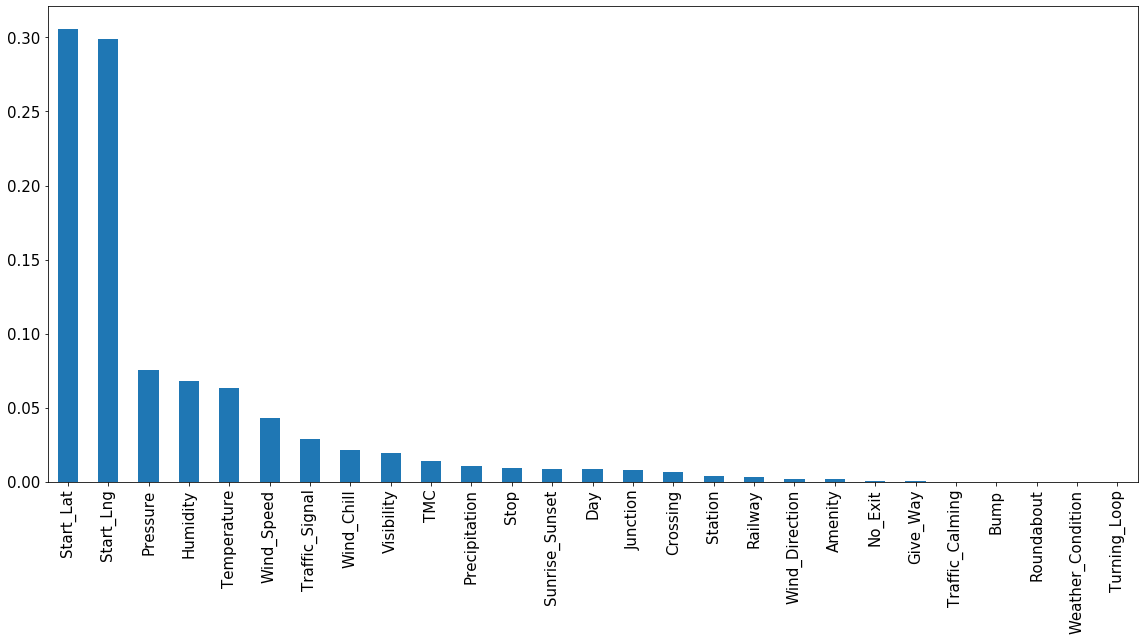

In [35]:
#Splitting the data into independent and dependent variables
X = df_CA.drop(columns=['Severity'], axis =1)
y = df_CA['Severity']


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# perform training
clf.fit(X_train, y_train)

# plot feature importances
# get feature importances
importances = clf.feature_importances_

# convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
# f_importances = pd.Series(importances, df_CA.drop(columns = 'Severity').columns)
f_importances = pd.Series(importances, df_CA.drop(columns = 'Severity').columns)


# sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# make the bar Plot from f_importances
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16, 9), rot=90, fontsize=15)

# show the plot
plt.tight_layout()
plt.show()


In [40]:
print ('='*80 + '\n')
print("top 25 important features and their importance values")
print(f_importances.index[0:15], f_importances.values[0:15])
print ('='*80 + '\n')



top 25 important features and their importance values
Index(['Start_Lat', 'Start_Lng', 'Pressure', 'Humidity', 'Temperature',
       'Wind_Speed', 'Traffic_Signal', 'Wind_Chill', 'Visibility', 'TMC',
       'Precipitation', 'Stop', 'Sunrise_Sunset', 'Day', 'Junction'],
      dtype='object') [0.30569455 0.2988452  0.07557974 0.06776066 0.0630233  0.04333072
 0.02887195 0.02124105 0.01907372 0.01372567 0.01060767 0.00924876
 0.00887018 0.00845344 0.00807936]



In [42]:
## Inportant Features
dff = df_CA.loc[:, ['Severity', 'Start_Lat', 'Start_Lng', 'Pressure', 'Humidity', 'Temperature',
       'Wind_Speed', 'Traffic_Signal', 'Wind_Chill', 'Visibility', 'TMC',
       'Precipitation', 'Stop', 'Sunrise_Sunset', 'Day', 'Junction']]
dff.head()

,Severity,Start_Lat,Start_Lng,Pressure,Humidity,Temperature,Wind_Speed,Traffic_Signal,Wind_Chill,Visibility,TMC,Precipitation,Stop,Sunrise_Sunset,Day,Junction
ID,,,,,,,,,,,,,,,,
A-729,3,38.085300,-122.233017,30.00,48.0,75.0,5.8,1,53.557295,10.0,201.0,0.015983,1,1,0,1
A-730,3,37.631813,-122.084167,30.06,48.0,75.0,4.6,1,53.557295,10.0,201.0,0.015983,1,1,0,1
A-731,2,37.896564,-122.070717,29.97,31.0,82.9,4.6,1,53.557295,10.0,201.0,0.015983,1,1,0,1
A-732,3,37.334255,-122.032471,30.04,48.0,75.9,4.6,1,53.557295,10.0,201.0,0.015983,1,1,0,1
A-733,2,37.250729,-121.910713,30.06,41.0,75.2,5.8,1,53.557295,10.0,201.0,0.015983,1,1,0,1


# Train Test Split

In [44]:
train = dff.drop(columns=['Severity'], axis =1)
Y = dff['Severity']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, Y, test_size=0.2, random_state=42)


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
transform = scaler.transform(X_train)
#test_img = scaler.transform(test_img)
scalar_train = pd.DataFrame(transform)
scalar_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.117229,-1.456591,0.153171,1.133538,-0.640147,-0.338631,0.311818,-0.270088,0.370005,-0.405319,0.106567,0.147142,-1.421630,-0.444819,-2.910192
1,-1.398370,1.342860,-0.148838,-1.438884,2.613112,0.754898,0.311818,-0.270088,0.370005,-0.405319,0.106567,0.147142,0.703418,-0.444819,0.343620
2,-1.319299,1.164085,0.037014,0.130729,0.585956,-0.127599,0.311818,-0.270088,0.370005,-0.405319,0.106567,0.147142,0.703418,-0.444819,0.343620
3,1.223230,-1.252021,-0.102375,0.610334,-0.476666,-0.568847,0.311818,-0.270088,0.370005,-0.405319,0.106567,0.147142,-1.421630,-0.444819,0.343620
4,2.675606,-2.350186,0.548107,1.395141,-0.223272,-0.338631,0.311818,-0.270088,0.370005,1.540304,0.106567,0.147142,0.703418,-0.444819,0.343620


In [50]:
y_train.unique()

array([3, 2, 4, 1], dtype=int64)

In [52]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(scalar_train, y_train)

In [53]:
from sklearn.preprocessing import StandardScaler
scalert = StandardScaler()
# Fit on training set only.
scalert.fit(X_test)
# Apply transform to both the training set and the test set.
transformt = scalert.transform(X_test)
#test_img = scaler.transform(test_img)
scalar_test = pd.DataFrame(transformt)

In [54]:
y_pred = clf.predict(scalar_test)

In [55]:
clf.score(scalar_train, y_train)


0.6186506741997978

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6178180732934724